In [821]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
housing = fetch_california_housing()


# 11 Feature Selection

In [822]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [823]:
report = []

In [824]:
x_data_generated.shape

(100, 20)

In [825]:
pd.Series(y_data_generated).value_counts()

0    50
1    50
Name: count, dtype: int64

<Axes: >

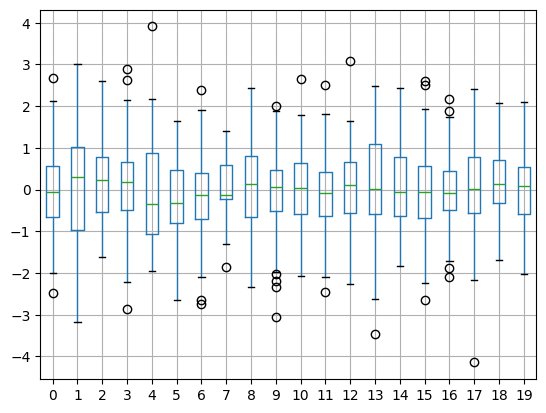

In [826]:
pd.DataFrame(x_data_generated).boxplot()

In [827]:
from sklearn.model_selection import cross_val_score

X = pd.DataFrame(x_data_generated, columns=[f"Feature_{i}" for i in range(x_data_generated.shape[1])])
y = y_data_generated

lg_model = LogisticRegression(random_state=0)
lg_model.fit(X, y)
mean_accuracy = cross_val_score(lg_model, X, y, scoring='accuracy').mean()
print(f"Средняя точность (Accuracy): {mean_accuracy:.2f}")
report.append(['Без удаления', x_data_generated.shape[1], f"{mean_accuracy:.2f}"])

Средняя точность (Accuracy): 0.86


### Используйте статистические методы для отбора признаков и `VarianceThreshold`

In [828]:
df = pd.DataFrame(x_data_generated, columns=[i for i in range(x_data_generated.shape[1])])
df['Target'] = y_data_generated
correlation_matrix = df.corr()
y = correlation_matrix['Target']
threshold_a = 0.2
selected_features_a = y[abs(y) > threshold_a].index.tolist()

selected_features_a.remove('Target')
accuracy_selected_c = cross_val_score(lg_model, df[selected_features_a], y_data_generated, scoring='accuracy').mean()

print("Выбранные признаки после отбора:", selected_features_a)
print(f"Средняя точность с отобранными признаками на корреляции corr (Accuracy): {accuracy_selected_c:.2f}")

report.append(['по корреляции 0.2', len(selected_features_a), f"{accuracy_selected_c:.2f}"])

Выбранные признаки после отбора: [2, 4, 7, 13]
Средняя точность с отобранными признаками на корреляции corr (Accuracy): 0.88


In [829]:
from sklearn.feature_selection import VarianceThreshold

threshold_b = 1
variance_selector = VarianceThreshold(threshold_b)
x_data_selected_b = variance_selector.fit_transform(df.drop(columns='Target'), df['Target'])
selected_feature_indices_b = variance_selector.get_support(indices=True)
df_selected_b = df.iloc[:, selected_feature_indices_b]

accuracy_selected_b = cross_val_score(lg_model, df_selected_b, df['Target'], scoring='accuracy').mean()
print("Выбранные признаки после отбора:", selected_feature_indices_b)
print(f"Средняя точность с отобранными признаками после отсечения низковариативных признаков VarianceThreshold (Accuracy): {accuracy_selected_b:.2f}")

report.append(['VarianceThreshold', len(selected_feature_indices_b), f"{accuracy_selected_b:.2f}"])

Выбранные признаки после отбора: [ 1  3  4  8 13 17]
Средняя точность с отобранными признаками после отсечения низковариативных признаков VarianceThreshold (Accuracy): 0.89


### На основании методов `SelectKBest` `f_classif`

In [830]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(df.drop(columns='Target'), df['Target'])

selected_feature_indices = selector.get_support(indices=True)
accuracy_selected_b = cross_val_score(lg_model, X_selected, df['Target'], scoring='accuracy').mean()

print("Выбранные признаки после отбора:", selected_feature_indices)
print(f"Средняя точность с отобранными признаками после отсечения низковариативных признаков SelectKBest (Accuracy): {accuracy_selected_b:.2f}")

report.append(['SelectKBest и f_classif', len(selected_feature_indices), f"{accuracy_selected_b:.2f}"])

Выбранные признаки после отбора: [ 0  2  4  7 13]
Средняя точность с отобранными признаками после отсечения низковариативных признаков SelectKBest (Accuracy): 0.88


### На основании методов `LogisticRegression`

In [831]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
selector = SelectFromModel(logistic_regression)
X_selected = selector.fit_transform(df.drop(columns='Target'), df['Target'])

selected_feature_indices = selector.get_support(indices=True)

accuracy_selected_b = cross_val_score(lg_model, X_selected, df['Target'], scoring='accuracy').mean()
print("Выбранные признаки после отбора:", selected_feature_indices)
print(f"Средняя точность с отобранными признаками после отсечения низковариативных признаков LogisticRegression (Accuracy): {accuracy_selected_b:.2f}")

report.append(['LogisticRegression', len(selected_feature_indices), f"{accuracy_selected_b:.2f}"])

Выбранные признаки после отбора: [ 0  1  2  4  5  8  9 10 11 12 14 15 16 17]
Средняя точность с отобранными признаками после отсечения низковариативных признаков LogisticRegression (Accuracy): 0.90


### На основании методов `RandomForestClassifier`

In [832]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
selector = SelectFromModel(random_forest)
X_selected = selector.fit_transform(df.drop(columns='Target'), df['Target'])

selected_feature_indices = selector.get_support(indices=True)
accuracy_selected_b = cross_val_score(lg_model, X_selected, df['Target'], scoring='accuracy').mean()
print("Выбранные признаки после отбора:", selected_feature_indices)
print(f"Средняя точность с отобранными признаками после отсечения низковариативных признаков RandomForestClassifier (Accuracy): {accuracy_selected_b:.2f}")

report.append(['RandomForestClassifier', len(selected_feature_indices), f"{accuracy_selected_b:.2f}"])

Выбранные признаки после отбора: [ 4  7 13]
Средняя точность с отобранными признаками после отсечения низковариативных признаков RandomForestClassifier (Accuracy): 0.88


### На основании методов `SequentialFeatureSelector`

In [833]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

selector =  SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=10, direction="forward"
)
X_selected = selector.fit_transform(df.drop(columns='Target'), df['Target'])
selected_feature_indices = selector.get_support()

accuracy_selected_b = cross_val_score(lg_model, X_selected, df['Target'], scoring='accuracy').mean()
print("кол. признаков:", selected_feature_indices.sum())
print(f"Средняя точность с отобранными признаками после отсечения низковариативных признаков SequentialFeatureSelector (Accuracy): {accuracy_selected_b:.2f}")

report.append(['RandomForestClassifier и SequentialFeatureSelector', selected_feature_indices.sum(), f"{accuracy_selected_b:.2f}"])

кол. признаков: 10
Средняя точность с отобранными признаками после отсечения низковариативных признаков SequentialFeatureSelector (Accuracy): 0.92


In [834]:
pd.DataFrame(report, columns=['способ выбора признаков', 'количество признаков', 'средняя точность модели']).sort_values('средняя точность модели', ascending=False)

,способ выбора признаков,количество признаков,средняя точность модели
6,RandomForestClassifier и SequentialFeatureSele...,10,0.92
4,LogisticRegression,14,0.90
2,VarianceThreshold,6,0.89
1,по корреляции 0.2,4,0.88
3,SelectKBest и f_classif,5,0.88
5,RandomForestClassifier,3,0.88
0,Без удаления,20,0.86


### Вывод

+ при удалении практически половины признаков точность составила `92%` при использовании метода `RandomForestClassifier и SequentialFeatureSelector`
+ но так же есть методы, которые при сохранении от `4` до `6` точность приближается к `90%` процентам
+ важно использовать разные методы, в зависимости от задачи